1- Data Gathering and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = "C:/Users/user/SpamDetector/emails/emails.csv"

In [3]:
df = pd.read_csv(dataset)

In [4]:
print(df.head())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [5]:
print('Data shape: ', df.shape)
print('Data shape rows: ', df.shape[0])
print('Data shape columns: ', df.shape[1])

Data shape:  (5172, 3002)
Data shape rows:  5172
Data shape columns:  3002


2- Data Exploration

In [6]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [7]:
print("The summation of NaN (Not a number) values for each column: \n", df.isna().sum())
print("The summation of NaN values for each column: ", df.isna().sum().sum())

The summation of NaN (Not a number) values for each column: 
 Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64
The summation of NaN values for each column:  0


The DataFrame doesn't have NaN values

In [8]:
#exploring the class label column: "Prediction"

dict_label_info = df.Prediction.value_counts().to_dict()
print("Label info: ", dict_label_info)

Label info:  {0: 3672, 1: 1500}


In [9]:
dict_map_label = { 'Not Spam ':0, 'Spam ':1}

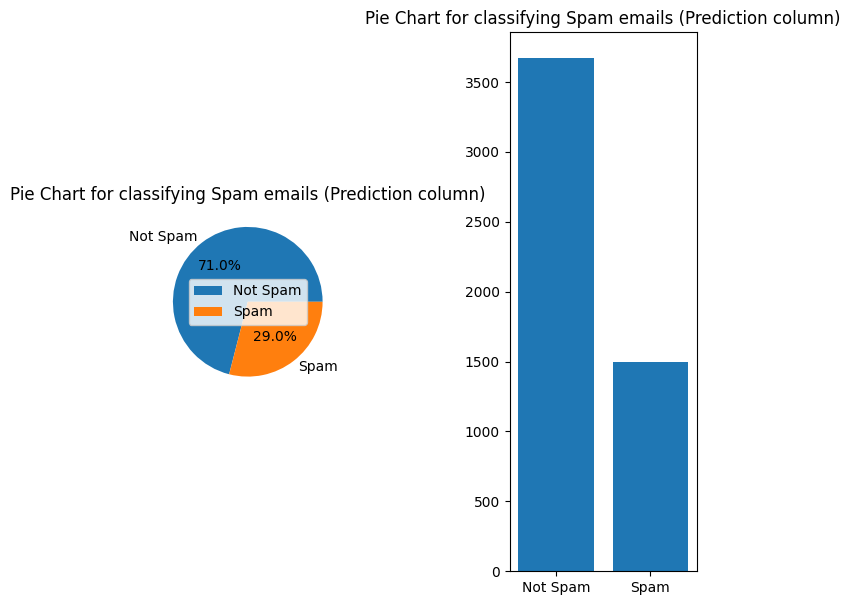

In [10]:
fig_size = (7, 7)
fig_dpi = 100
n_rows = 1
n_columns = 2

fig = plt.figure(figsize=fig_size, dpi=fig_dpi)
ax1 = fig.add_subplot(n_rows, n_columns, 1)

ax1.pie(x = list(dict_label_info.values()), labels=["Not Spam", "Spam"], autopct='%1.1f%%')
ax1.set_title("Pie Chart for classifying Spam emails (Prediction column)")
ax1.legend()

ax2 = fig.add_subplot(n_rows, n_columns, 2)

ax2.bar( ["Not Spam", "Spam"], list(dict_label_info.values()))
ax2.set_title("Pie Chart for classifying Spam emails (Prediction column)")

plt.subplots_adjust(wspace=0.9, hspace=0.4)
plt.show()

Number of Not-spam emails are more than double of spam
so it's not balanced

To balance data:

1- Calculate total number of words
2- Separate Spam and Not Spam

In [11]:
total_words = df.iloc[:, 1:-1].sum().sum()
total_not_spam_words = df[df.Prediction==0].iloc[:, 1:-1].sum().sum()
total_spam_words = df[df.Prediction==1].iloc[:, 1:-1].sum().sum()

print('Total number of words in emails: ', total_words)
print('Total number of words in non-spam emails: ', total_not_spam_words)
print('Total number of words in spam emails: ', total_spam_words)

Total number of words in emails:  6026877
Total number of words in non-spam emails:  3838679
Total number of words in spam emails:  2188198


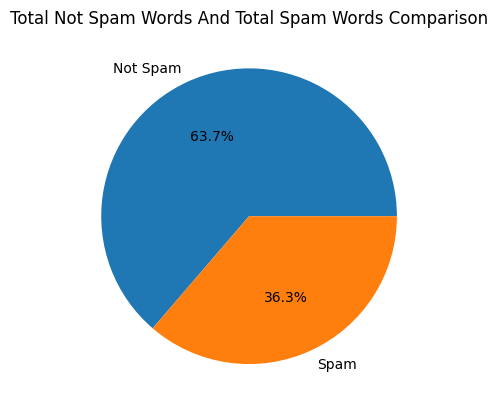

In [12]:
plt.pie(x=[total_not_spam_words, total_spam_words], labels=['Not Spam', 'Spam'], autopct='%1.1f%%')
plt.title("Total Not Spam Words And Total Spam Words Comparison")
plt.show()

Spam emails usually contain more words

In [13]:
df.iloc[0, :]

Email No.     Email 1
the                 0
to                  0
ect                 1
and                 0
               ...   
military            0
allowing            0
ff                  0
dry                 0
Prediction          0
Name: 0, Length: 3002, dtype: object

In [14]:
def get_words_in_columns(df_row):
    for i in range(len(df_row)):
        if df_row[i] > 0:
            print(df_row.index[i], end=', ')

get_words_in_columns(df.iloc[0, 1:-1])

ect, a, is, i, s, as, re, e, t, j, m, b, p, c, r, f, h, u, tu, st, ic, far, chris, hr, rm, tr, pictures, pi, ma, picture, ct, christmas, ur, tm, 

C:\Users\user\AppData\Local\Temp\ipykernel_31540\2513860295.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_row[i] > 0:


Drop words less than 3 characters

In [15]:
n = 2
count_cols_gt_2 = 0
for col_name in df.columns:
    if len(col_name) > n:
        count_cols_gt_2 += 1
        
print(f'Number of columns containing words with more than {n} characters', count_cols_gt_2)
print(f'Number of columns containing words with less than or equal {n} characters', len(df.columns) - count_cols_gt_2)

Number of columns containing words with more than 2 characters 2849
Number of columns containing words with less than or equal 2 characters 153


Total words excluding less than 3 character columns

In [16]:
print('Total Number of words ',
df.iloc[:, 1:-1].sum().sum())

print('Number of words containing more than 2 characters: ',
df.loc[:, [col for col in df.columns[1: -1] if len(col)>2]].sum().sum())

# print('Number of words containing less than or equal 2 characters: ',
# df.loc[:, [col for col in df.columns[1: -1] if len(col)<=2]].sum().sum())
#or 
print('Number of words containing less than or equal 2 characters: ',
df.iloc[:, 1: -1].sum().sum() - df.loc[:, [col for col in df.columns[1:-1] if len(col)>2]].sum().sum())


Total Number of words  6026877
Number of words containing more than 2 characters:  948423
Number of words containing less than or equal 2 characters:  5078454



3- Data Pre-Processing 


In [17]:
df_1 = df.loc[:, [col for col in df.columns[1:-1] if len(col)>2]]

print('New data frame excluding columns containing less than 3 chars: ', df_1.shape)
print('Number of Removed columns: ', df.shape[1] - df_1.shape[1] )

New data frame excluding columns containing less than 3 chars:  (5172, 2847)
Number of Removed columns:  155


In [18]:
print(df_1.head)

<bound method NDFrame.head of       the  ect  and  for  you  hou  this  enron  that  will  ...  ifhsc  \
0       0    1    0    0    0    0     0      0     0     0  ...      0   
1       8   24    6    6    1   27     0      1     2     0  ...      0   
2       0    1    0    0    0    0     0      0     0     0  ...      0   
3       0   22    0    5    2   10     2      0     0     0  ...      0   
4       7   17    1    5    0    9     2      0     0     0  ...      0   
...   ...  ...  ...  ...  ...  ...   ...    ...   ...   ...  ...    ...   
5167    2    2    3    0    0    0     0      0     0     0  ...      0   
5168   35   11    2    6    4    3     3      1     6     2  ...      0   
5169    0    1    1    0    0    0     1      0     0     0  ...      0   
5170    2    1    0    2    2    0     1      0     0     0  ...      0   
5171   22    5    1    6    8    2     4      1     4     1  ...      0   

      enhancements  connevey  jay  valued  lay  infrastructure  milit

View word count for new data

In [19]:
ser_word_count = df_1.sum()
print(ser_word_count)

the               34345
ect               26604
and               15907
for               16161
you               12757
                  ...  
lay                 507
infrastructure       22
military             34
allowing             21
dry                  36
Length: 2847, dtype: int64


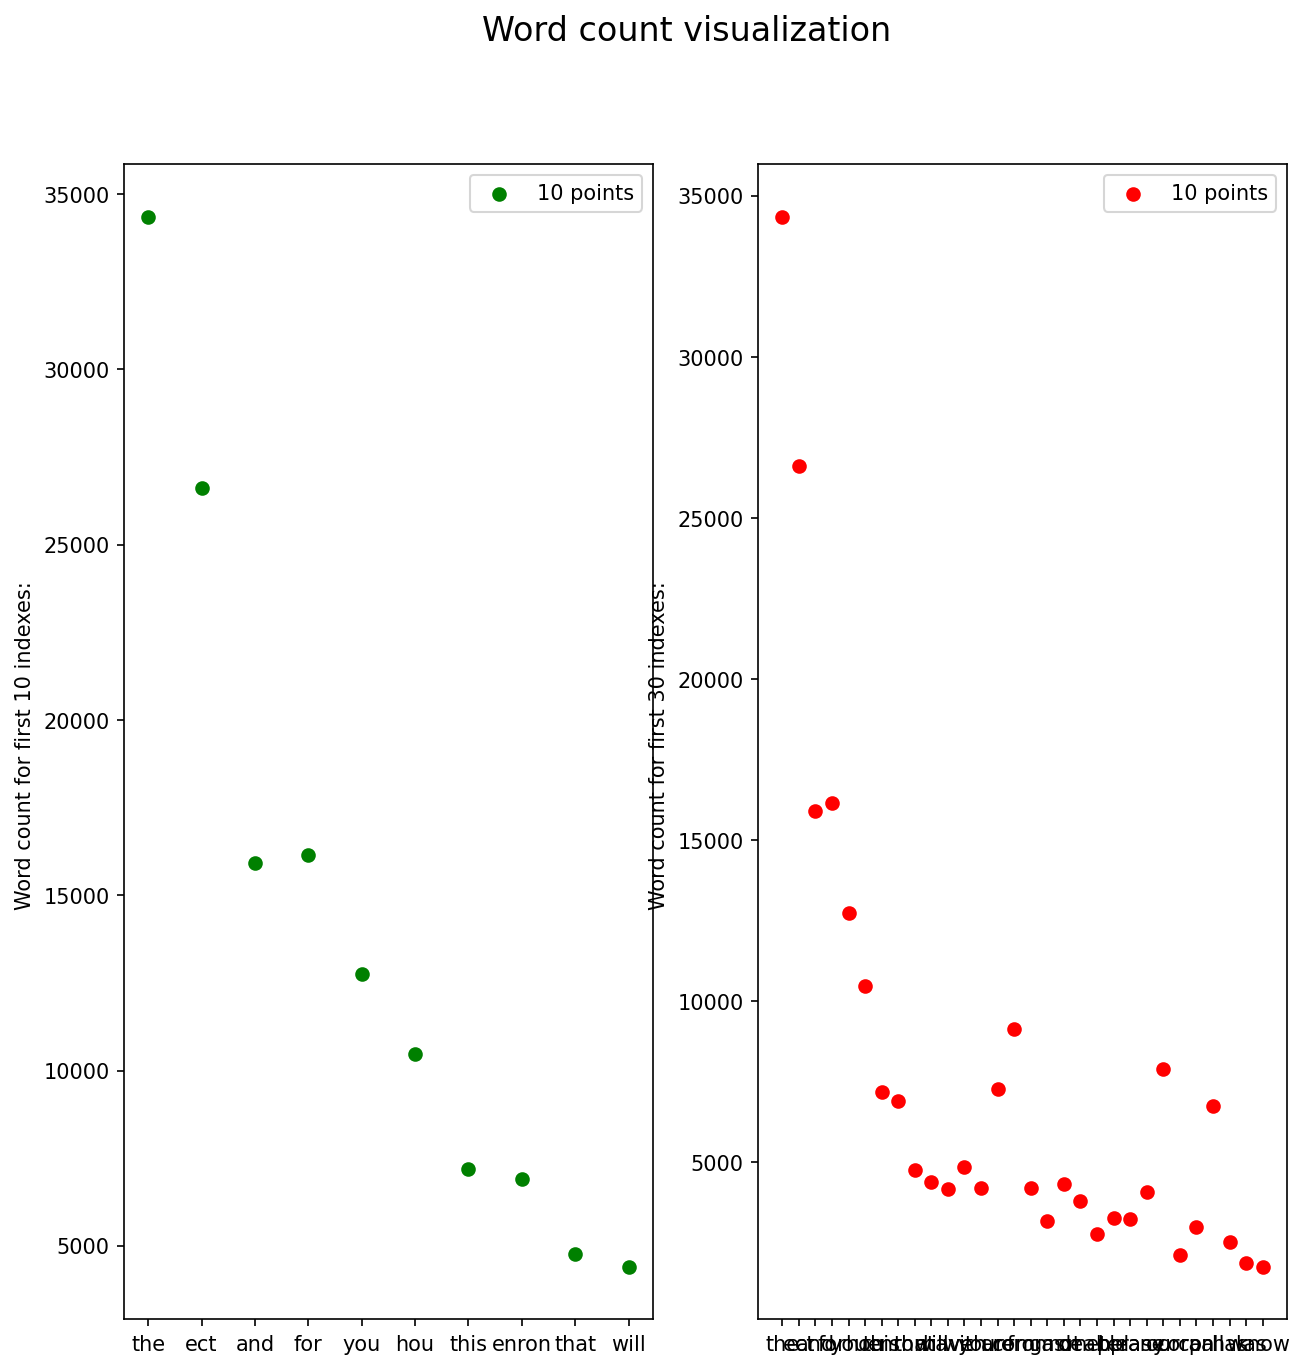

In [20]:
n_rows = 1
n_cols = 2

fig = plt.figure(figsize=(10, 10), dpi=150)
fig.suptitle('Word count visualization', fontsize=16)

ax1 = fig.add_subplot(n_rows, n_cols, 1)
ax1.set_ylabel('Word count for first 10 indexes: ')
ax1.scatter(x=ser_word_count.index[:10], y=ser_word_count.values[:10], color='green', label='10 points')
ax1.legend()

ax2 = fig.add_subplot(n_rows, n_cols, 2)
ax2.set_ylabel('Word count for first 30 indexes: ')
ax2.scatter(x=ser_word_count.index[:30], y=ser_word_count.values[:30], color='red', label='10 points')
ax2.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


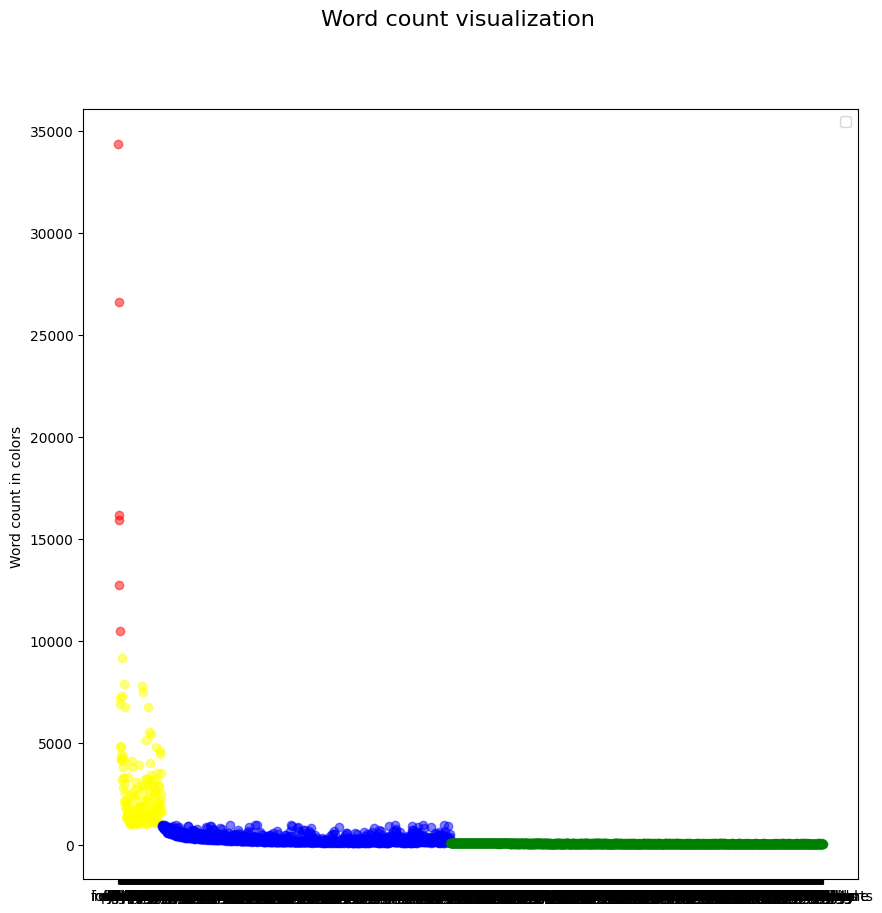

In [21]:
n_rows = 1
n_cols = 1

fig = plt.figure(figsize=(10, 10), dpi=100)
fig.suptitle('Word count visualization', fontsize=16)

ax1 = fig.add_subplot(n_rows, n_cols, 1)
ax1.set_ylabel('Word count in colors ')

words_gt_10k = ser_word_count[(ser_word_count>10000)]     
words_gt_1k = ser_word_count[(ser_word_count<=10000) & (ser_word_count>1000)]      
words_lt_1k = ser_word_count[(ser_word_count<=1000) & (ser_word_count>100)]      
words_lt_100 = ser_word_count[(ser_word_count<=100)] 

ax1.scatter(x=words_gt_10k.index, y=words_gt_10k.values, color='red', alpha=0.5)      
ax1.scatter(x=words_gt_1k.index, y=words_gt_1k.values, color='yellow', alpha=0.5)      
ax1.scatter(x=words_lt_1k.index, y=words_lt_1k.values, color='blue', alpha=0.5)      
ax1.scatter(x=words_lt_100.index, y=words_lt_100.values, color='green', alpha=0.5)   

ax1.legend()
plt.show()   

Red and yellow valued indexes will be droped because they're not useful
So remove stop words

In [22]:
sw_list = ["ect", "i","me","my","myself","we","our",
           "ours","ourselves","you","your","yours",
           "yourself","yourselves","he","him","his",
           "himself","she","her","hers","herself",
           "it","its","itself","they","them","their",
           "theirs","themselves","what","which","who",
           "whom","this","that","these","those","am",
           "is","are","was","were","be","been","being",
           "have","has","had","having","do","does","did",
           "doing","a","an","the","and","but","if","or",
           "because","as","until","while","of","at","by",
           "for","with","about","against","between","into",
           "through","during","before","after","above","below",
           "to","from","up","down","in","out","on","off","over",
           "under","again","further","then","once","here","there",
           "when","where","why","how","all","any","both","each",
           "few","more","most","other","some","such","no","nor",
           "not","only","own","same","so","than","too","very","s",
           "t","can","will","just","don","should","now"]

In [23]:
df_without_sw = df_1.loc[:, [col for col in df_1.columns if col not in sw_list]]

print("The shape of Data-Frame without stop-words : ", df_without_sw.shape)
print("Number of excluded columns : ", df_1.shape[1] - df_without_sw.shape[1])

The shape of Data-Frame without stop-words :  (5172, 2754)
Number of excluded columns :  93


Removing stopwords to eliminate unimportant words, allowing applications to focus on the important words instead

In [24]:
df_without_sw

,hou,enron,com,gas,deal,meter,hpl,please,corp,know,...,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,dry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27,1,3,1,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,2,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,3,1,3,5,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5170,0,0,4,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualize data without stop words

In [ ]:
vs_df_without_sw = df_without_sw.plot()

nrows = 2
ncols = 2

fig = plt.figure(figsize=(10, 10), dpi=100)
fig.subtitle('Scatter plot of different columns')

axs1 = fig.add_subplot(figsize=(nrows, ncols), 1)
axs1.set_ylabel('Total number of words')
axs1.scatter(x=vs_df_without_sw.index[:10], y=vs_df_without_sw.value[:10],color='green', label='10 points')
axs1.legend()

axs2 = fig.add_subplot(figsize=(nrows, ncols), 2)
axs2.set_ylabel('Total number of words')
axs2.scatter(x=vs_df_without_sw.index[:50], y=vs_df_without_sw.value[:50],color='yellow', label='10 points')
axs2.legend()

axs3 = fig.add_subplot(figsize=(nrows, ncols), 3)
axs3.set_ylabel('Total number of words')
axs3.scatter(x=vs_df_without_sw.index[:100], y=vs_df_without_sw.value[:100],color='red', label='10 points')
axs3.legend()

axs4 = fig.add_subplot(figsize=(nrows, ncols), 4)
axs4.set_ylabel('Total number of words')
axs4.scatter(x=vs_df_without_sw.index[:1000], y=vs_df_without_sw.value[:1000],color='blue', label='10 points')
axs4.legend()

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Sum all word's frequencies

In [ ]:
nrows = 1
ncols = 1
#less dpi than (default dpi=100) to see more transparent
fig = plt.figure(figsize(10, 10), dpi=80)
fig.subtitle('Figure of the sum of words frequencies')

ax1 = fig.add_subplot(fig_size(nrows, ncols), 1)
   
sum_data_gt_10000 = ser_word_count[ser_word_count>10000]    
sum_data_b_5000_10000 = ser_word_count[(ser_word_count < 10000)  &  (ser_word_count>=5000)]
sum_data_b_1000_5000 = ser_word_count[(ser_word_count < 5000)  &   (ser_word_count>=1000)]
sum_data_b_100_1000 = ser_word_count[(ser_word_count < 1000)  &  (ser_word_count>=100)]
sum_lt_100 = ser_word_count[ser_word_count < 100 ]

ax1.scatter(x=sum_data_gt_10000.index,
            y=sum_data_gt_10000.values
            color='blue',
            label=f'Greater than 10000 - {len(sum_data_gt_10000)} point',
            alpha=0.5
            )   

ax1.scatter(x=sum_data_b_5000_10000.index,
            y=sum_data_b_5000_10000.values
            color='red'
            label = f"Between 5000 and 10000 - {len(sum_data_b_5000_10000)} point",
            alpha= 0.50 
            )   

ax1.scatter(x=sum_data_b_1000_5000.index,
            y=sum_data_b_1000_5000.values
            color='yellow',
            label = f"Between 1000 and 5000 - {len(sum_data_b_1000_5000)} point",
            alpha= 0.50
            )   

ax1.scatter(x=sum_data_b_100_1000.index,
            y=sum_data_b_100_1000.values
            color='green',
            label = f"Between 100 and 1000 - {len(sum_data_b_100_1000)} point",
            alpha= 0.50
            )   

ax1.scatter(x=sum_lt_100.index,
            y=sum_lt_100.values,
            color = "yellow",
            label = f"less than 100 - {len(sum_lt_100)} point",
            alpha= 0.50 
            )

axs1.legend()
ax1.show()